In [26]:
import pandas as pd
import numpy as np
import scipy.stats as stats

In [27]:
data = pd.read_csv('NE PAS TOUCHER.csv')
data.columns = data.columns.str.strip()

data

,name,cargo_capacity,mass,crew,manufacturer,type,status,role,price,release_date,price_ingame,scm,max,length,beam,height
0,100i,2,48143,1,Origin Jumpworks,multi,flight-ready,"{'0': 'Starter', '1': 'Touring'}",50.0,2020,1146600.0,260.0,1425.0,19.00,12.00,5.00
1,125a,2,48143,1,Origin Jumpworks,multi,flight-ready,"{'0': 'Starter', '1': 'Light Fighter'}",60.0,2020,1587600.0,260.0,1425.0,19.00,12.00,5.00
2,135c,6,48143,1,Origin Jumpworks,multi,flight-ready,"{'0': 'Starter', '1': 'Light Freight'}",65.0,2020,1490580.0,260.0,1425.0,19.00,12.00,5.00
3,300i,8,79677,1,Origin Jumpworks,multi,flight-ready,"{'0': 'Touring', '1': 'Luxury'}",60.0,2014,1375920.0,260.0,1425.0,27.00,17.00,8.00
4,315p,12,80592,1,Origin Jumpworks,exploration,flight-ready,{'0': 'Pathfinder'},65.0,2014,1490580.0,260.0,1425.0,27.00,17.00,8.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,X1 Force,0,4730,1,Origin Jumpworks,exploration,flight-ready,{'0': 'Combat'},50.0,2023,132300.0,207.0,569.0,1.55,5.19,1.87
197,X1 Velocity,0,4730,1,Origin Jumpworks,competition,flight-ready,{'0': 'Racing'},45.0,2023,119070.0,222.0,611.0,1.55,5.19,1.87
198,Zeus CL Mk II,128,295000,3,Roberts Space Industries,transport,flight-ready,{'0': 'Medium Freight'},150.0,2024,6804000.0,200.0,1000.0,45.70,34.30,7.00
199,Zeus ES Mk II,32,295000,3,Roberts Space Industries,exploration,flight-ready,{'0': 'Expedition'},150.0,2024,4422600.0,200.0,1050.0,45.70,34.30,7.00


In [28]:
data.keys()

Index(['name', 'cargo_capacity', 'mass', 'crew', 'manufacturer', 'type',
       'status', 'role', 'price', 'release_date', 'price_ingame', 'scm', 'max',
       'length', 'beam', 'height'],
      dtype='object')

In [29]:
# Convert numeric columns, keeping original column names
numeric_columns = ['price_ingame', 'cargo_capacity', 'mass', 'crew', 'price', 'scm', 'max', 'length', 'beam', 'height']

for col in numeric_columns:
    # Find the matching column name with potential trailing spaces
    matching_col = [c for c in data.columns if c.strip() == col][0]
    # Convert to numeric and assign back to clean column name
    data[col] = pd.to_numeric(data[matching_col], errors='coerce')

In [ ]:
# Define numeric columns that might have missing values
colonnes_avec_valeurs_manquantes = numeric_columns

copie_stardle_db = data.copy(deep=True)

# First pass: Fill with 0 if all values in a group are NaN
for (type_value, status_value), group_data in data.groupby(["type","status"]):
    for colonne in colonnes_avec_valeurs_manquantes:
        if group_data[colonne].isna().all():
            copie_stardle_db.loc[(copie_stardle_db["type"] == type_value) & (copie_stardle_db["status"] == status_value), colonne] = 0

# Second pass: Fill remaining NaN values with group means
for colonne in colonnes_avec_valeurs_manquantes:
    moyennes = data.groupby(["type","status"])[colonne].transform('mean')
    copie_stardle_db[colonne] = copie_stardle_db[colonne].fillna(moyennes)
    
    
data = copie_stardle_db

data

In [39]:
data.to_csv('data.csv')

In [31]:
# Obtenir la liste unique des types de vaisseaux
types_vaisseaux = data['type'].unique()

# Créer un dictionnaire pour stocker les différents DataFrames
df_by_type = {}

# Créer un DataFrame pour chaque type de vaisseau
for type_vaisseau in types_vaisseaux:
    df_by_type[type_vaisseau] = data[data['type'] == type_vaisseau].copy()

# Afficher les informations sur chaque DataFrame créé
for type_vaisseau, df in df_by_type.items():
    print(f"\nType de vaisseau: {type_vaisseau}")
    print(f"Nombre de vaisseaux: {len(df)}")
    print("-" * 50)


Type de vaisseau: multi       
Nombre de vaisseaux: 13
--------------------------------------------------

Type de vaisseau: exploration 
Nombre de vaisseaux: 22
--------------------------------------------------

Type de vaisseau: combat      
Nombre de vaisseaux: 70
--------------------------------------------------

Type de vaisseau: competition 
Nombre de vaisseaux: 14
--------------------------------------------------

Type de vaisseau: support     
Nombre de vaisseaux: 10
--------------------------------------------------

Type de vaisseau: industrial  
Nombre de vaisseaux: 14
--------------------------------------------------

Type de vaisseau: ground      
Nombre de vaisseaux: 28
--------------------------------------------------

Type de vaisseau: transport   
Nombre de vaisseaux: 30
--------------------------------------------------


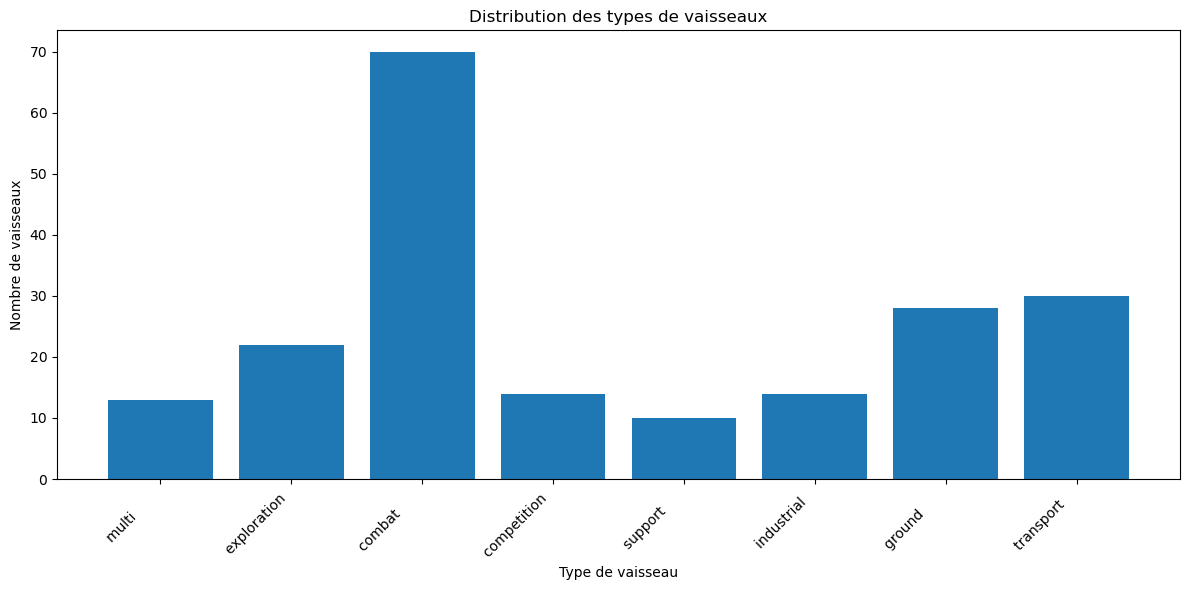

In [32]:
import matplotlib.pyplot as plt

# Préparer les données pour l'histogramme
types = list(df_by_type.keys())
counts = [len(df) for df in df_by_type.values()]

# Créer la figure avec une taille personnalisée
plt.figure(figsize=(12, 6))

# Créer l'histogramme
plt.bar(types, counts)

# Personnaliser le graphique
plt.title('Distribution des types de vaisseaux')
plt.xlabel('Type de vaisseau')
plt.ylabel('Nombre de vaisseaux')

# Rotation des labels sur l'axe x pour une meilleure lisibilité
plt.xticks(rotation=45, ha='right')

# Ajuster automatiquement les marges
plt.tight_layout()

# Afficher le graphique
plt.show()

In [33]:
combat = df_by_type['combat      ']

combat

,name,cargo_capacity,mass,crew,manufacturer,type,status,role,price,release_date,price_ingame,scm,max,length,beam,height
5,325a,4,79324.0,1,Origin Jumpworks,combat,flight-ready,"{'0': 'Light Fighter', '1': 'Interdiction'}",70.0,2014,1852200.0,260.0,1425.0,27.5,17.0,8.0
12,A1 Spirit,0,314271.0,2,Crusader Industries,combat,flight-ready,{'0': 'Bomber'},200.0,2023,4961250.0,204.0,1130.0,47.5,44.0,10.0
13,A2 Hercules,216,3139240.0,8,Crusader Industries,combat,flight-ready,{'0': 'Heavy Bomber'},750.0,2021,44296876.0,160.0,950.0,70.0,94.0,23.0
16,Ares Star Fighter Inferno,0,329001.0,1,Crusader Industries,combat,flight-ready,{'0': 'Heavy Fighter'},250.0,2021,4725000.0,210.0,110.0,27.0,30.0,6.0
17,Ares Star Fighter Ion,0,329001.0,1,Crusader Industries,combat,flight-ready,{'0': 'Heavy Fighter'},250.0,2021,4725000.0,210.0,1100.0,27.0,30.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,Vanguard Harbinger,0,236604.0,2,Aegis Dynamics,combat,flight-ready,{'0': 'Bomber'},290.0,2019,11510100.0,219.0,1115.0,48.0,40.0,9.5
190,Vanguard Hoplite,0,234870.0,2,Aegis Dynamics,combat,flight-ready,{'0': 'Dropship'},240.0,2016,9327150.0,209.0,1115.0,48.0,40.0,9.5
191,Vanguard Sentinel,0,232170.0,2,Aegis Dynamics,combat,flight-ready,{'0': 'Interdiction'},275.0,2019,10914750.0,217.0,1111.0,48.0,40.0,9.5
192,Vanguard Warden,0,244270.0,2,Aegis Dynamics,combat,flight-ready,{'0': 'Heavy Fighter'},260.0,2016,10319400.0,215.0,1111.0,48.0,40.0,9.5



Constructeur: Origin Jumpworks                          
Nombre de vaisseaux: 19
--------------------------------------------------

Constructeur: Crusader Industries                       
Nombre de vaisseaux: 11
--------------------------------------------------

Constructeur: Roberts Space Industries                  
Nombre de vaisseaux: 26
--------------------------------------------------

Constructeur: Anvil Aerospace                           
Nombre de vaisseaux: 28
--------------------------------------------------

Constructeur: Argo Astronautics                         
Nombre de vaisseaux: 8
--------------------------------------------------

Constructeur: Aegis Dynamics                            
Nombre de vaisseaux: 22
--------------------------------------------------

Constructeur: Esperia                                   
Nombre de vaisseaux: 5
--------------------------------------------------

Constructeur: Drake Interplanetary                      
Nombre de vai

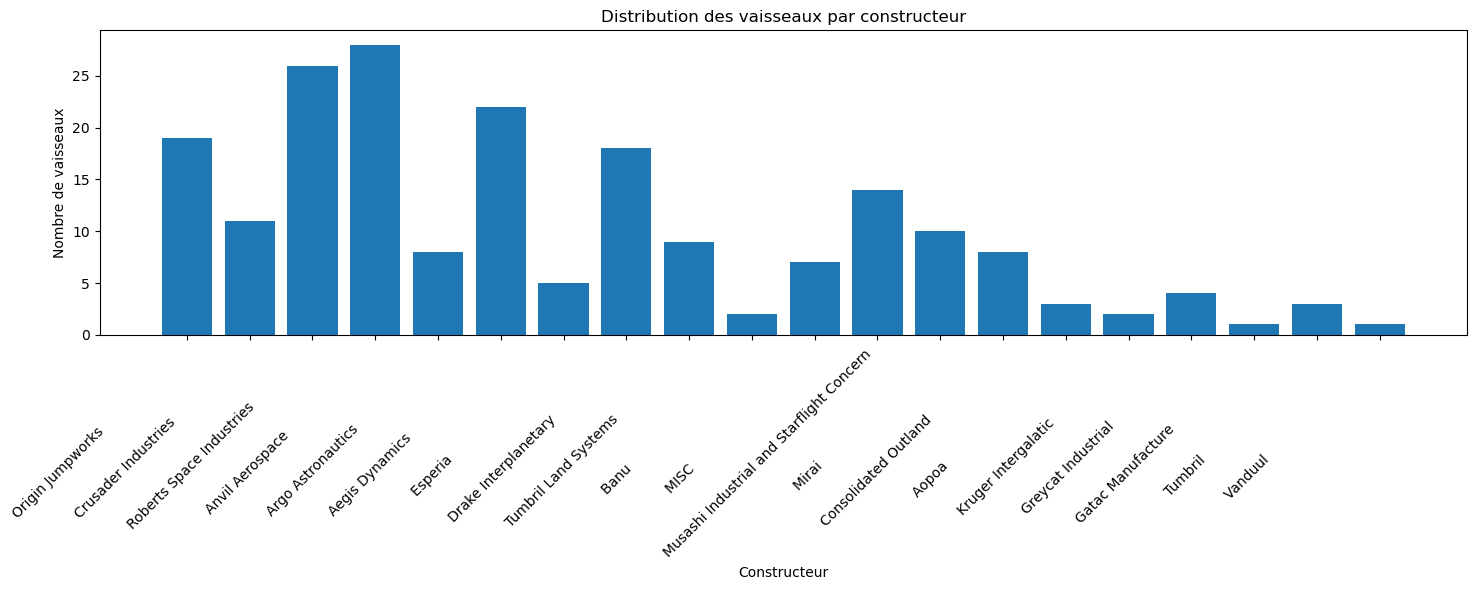

In [34]:
# Obtenir la liste unique des constructeurs
constructeurs = data['manufacturer'].unique()

# Créer un dictionnaire pour stocker les différents DataFrames
df_by_manufacturer = {}

# Créer un DataFrame pour chaque constructeur
for constructeur in constructeurs:
    df_by_manufacturer[constructeur] = data[data['manufacturer'] == constructeur].copy()

# Afficher les informations sur chaque DataFrame créé
for constructeur, df in df_by_manufacturer.items():
    print(f"\nConstructeur: {constructeur}")
    print(f"Nombre de vaisseaux: {len(df)}")
    print("-" * 50)

# Visualiser la distribution avec un graphique en barres
plt.figure(figsize=(15, 6))
manufacturers = list(df_by_manufacturer.keys())
counts = [len(df) for df in df_by_manufacturer.values()]

plt.bar(manufacturers, counts)
plt.title('Distribution des vaisseaux par constructeur')
plt.xlabel('Constructeur')
plt.ylabel('Nombre de vaisseaux')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [35]:
# Créer un dictionnaire qui associe chaque constructeur à un nombre entier
constructeur_to_int = {constructeur: i for i, constructeur in enumerate(constructeurs)}

# Afficher les associations
print("Association constructeurs - nombres entiers :")
for constructeur, numero in constructeur_to_int.items():
    print(f"{constructeur}: {numero}")
    

Association constructeurs - nombres entiers :
Origin Jumpworks                          : 0
Crusader Industries                       : 1
Roberts Space Industries                  : 2
Anvil Aerospace                           : 3
Argo Astronautics                         : 4
Aegis Dynamics                            : 5
Esperia                                   : 6
Drake Interplanetary                      : 7
Tumbril Land Systems                      : 8
Banu                                      : 9
MISC                                      : 10
Musashi Industrial and Starflight Concern : 11
Mirai                                     : 12
Consolidated Outland                      : 13
Aopoa                                     : 14
Kruger Intergalatic                       : 15
Greycat Industrial                        : 16
Gatac Manufacture                         : 17
Tumbril                                   : 18
Vanduul                                   : 19


In [36]:
types = list(df_by_type.keys())


df_by_type_to_int = {type : i for i, type in enumerate(types)}

df_by_type_to_int

{'multi       ': 0,
 'exploration ': 1,
 'combat      ': 2,
 'competition ': 3,
 'support     ': 4,
 'industrial  ': 5,
 'ground      ': 6,
 'transport   ': 7}

In [37]:
coords = np.zeros((len(data), 2))
man = list(data['manufacturer_number'])
typ = list(data['type_number'])
# Fill the coord array with the corresponding numbers
for i in range(len(data)):
    coord = (man[i], typ[i])
    coords[i] = coord

KeyError: 'manufacturer_number'

In [ ]:
plt.scatter(coords[:, 0], coords[:, 1], alpha=0.5)

In [40]:
data_clean = data.copy()

def calculate_distance(vaisseau1, vaisseau2, data):
    """Calcule la distance entre deux vaisseaux basée sur leurs caractéristiques"""
    # Caractéristiques numériques à comparer
    features = ['mass', 'cargo_capacity', 'scm', 'max', 'length', 'beam', 'height']
    
    # Normalisation des caractéristiques
    normalized_features = {}
    for feature in features:
        min_val = data[feature].min()
        max_val = data_clean[feature].max()
        normalized_features[feature] = (data_clean[feature] - min_val) / (max_val - min_val)
    
    # Calculer la distance euclidienne
    distance = 0
    for feature in features:
        val1 = normalized_features[feature][data_clean['name'] == vaisseau1].iloc[0]
        val2 = normalized_features[feature][data_clean['name'] == vaisseau2].iloc[0]
        distance += (val1 - val2) ** 2
    
    # Ajouter une pénalité si les types ou constructeurs sont différents
    if data_clean[data_clean['name'] == vaisseau1]['type'].iloc[0] != \
       data_clean[data_clean['name'] == vaisseau2]['type'].iloc[0]:
        distance += 1
        
    if data_clean[data_clean['name'] == vaisseau1]['manufacturer'].iloc[0] != \
       data_clean[data_clean['name'] == vaisseau2]['manufacturer'].iloc[0]:
        distance += 1
    
    if data_clean[data_clean['name'] == vaisseau1]['role'].iloc[0] != \
       data_clean[data_clean['name'] == vaisseau2]['role'].iloc[0]:
        distance += 1
        
        
    return np.sqrt(distance)

def find_shortest_path(start_ship, end_ship, data_clean):
    """Trouve le plus court chemin entre deux vaisseaux en utilisant l'algorithme de Dijkstra"""
    from collections import defaultdict
    import heapq
    
    # Créer un graphe de distances entre tous les vaisseaux
    ships = list(data_clean['name'])
    distances = defaultdict(dict)
    
    # Calculer les distances entre chaque paire de vaisseaux
    for i in range(len(ships)):
        for j in range(i + 1, len(ships)):
            dist = calculate_distance(ships[i], ships[j], data_clean)
            distances[ships[i]][ships[j]] = dist
            distances[ships[j]][ships[i]] = dist
    
    # Initialisation de l'algorithme de Dijkstra
    queue = [(0, start_ship, [start_ship])]
    visited = set()
    
    while queue:
        (cost, current, path) = heapq.heappop(queue)
        
        if current == end_ship:
            return path, cost
            
        if current in visited:
            continue
            
        visited.add(current)
        
        for neighbor in distances[current]:
            if neighbor not in visited:
                heapq.heappush(queue, 
                              (cost + distances[current][neighbor],
                               neighbor,
                               path + [neighbor]))
    
    return None, None

# Exemple d'utilisation
def show_path_between_ships():
    print("Liste des vaisseaux disponibles:")
    for idx, name in enumerate(data_clean['name']):
        print(f"{idx + 1}. {name}")
    
    start_idx = int(input("\nChoisissez le numéro du vaisseau de départ: ")) - 1
    end_idx = int(input("Choisissez le numéro du vaisseau d'arrivée: ")) - 1
    
    start_ship = data_clean['name'].iloc[start_idx]
    end_ship = data_clean['name'].iloc[end_idx]
    
    path, total_distance = find_shortest_path(start_ship, end_ship, data_clean)
    
    if path:
        print(f"\nPlus court chemin trouvé (distance totale: {total_distance:.2f}):")
        for i, ship in enumerate(path):
            if i < len(path) - 1:
                dist = calculate_distance(ship, path[i+1], data_clean)
                print(f"{ship} -> ({dist:.2f}) -> ", end='')
            else:
                print(ship)
    else:
        print("\nAucun chemin trouvé entre ces vaisseaux.")

# Exécuter la fonction
show_path_between_ships()

Liste des vaisseaux disponibles:
1. 100i                       
2. 125a                       
3. 135c                       
4. 300i                       
5. 315p                       
6. 325a                       
7. 350r                       
8. 400i                       
9. 600i Explorer              
10. 600i Touring               
11. 85X                        
12. 890 Jump                   
13. A1 Spirit                  
14. A2 Hercules                
15. Apollo Medivac             
16. Apollo Triage              
17. Ares Star Fighter Inferno  
18. Ares Star Fighter Ion      
19. Arrastra                   
20. Arrow                      
21. ATLS                       
22. Aurora CL                  
23. Aurora ES                  
24. Aurora LN                  
25. Aurora LX                  
26. Aurora MR                  
27. Avenger Stalker            
28. Avenger Titan              
29. Avenger Warlock            
30. Ballista                   
31. Blade       

ValueError: invalid literal for int() with base 10: '125a'

In [ ]:
# Créer un dictionnaire pour stocker les vaisseaux par rôle
ships_by_role = {}

# Pour chaque vaisseau dans le DataFrame
for _, row in data.iterrows():
    # Split les rôles (certains vaisseaux peuvent avoir plusieurs rôles)
    # Vérifier si la valeur est une chaîne avant de faire le split
    if pd.notna(row['role']):
        roles = str(row['role']).split(',')
        
        # Pour chaque rôle du vaisseau
        for role in roles:
            # Nettoyer le rôle
            role = role.split("'")[3]  # Enlever les espaces
            if role:  # Vérifier que le rôle n'est pas vide
                # Si le rôle n'existe pas encore dans le dictionnaire, créer une nouvelle liste
                if role not in ships_by_role:
                    ships_by_role[role] = []
                # Ajouter le nom du vaisseau à la liste correspondant à ce rôle
                name = row['name'].strip()
                ships_by_role[role].append(name)

ships_by_role

{'Starter': ['100i',
  '125a',
  '135c',
  'Aurora ES',
  'Cutter',
  'Cutter Rambler',
  'Nomad',
  'Reliant Kore'],
 'Touring': ['100i',
  '300i',
  '400i',
  '600i Touring',
  '85X',
  'G12',
  'PTV',
  'Ranger CV',
  'X1'],
 'Light Fighter': ['125a',
  '325a',
  'Arrow',
  'Aurora LN',
  'Aurora MR',
  'Blade',
  'Defender',
  'Gladius',
  'Hawk',
  'Khartu-Al',
  'Mustang Delta',
  'Reliant Tana',
  'Talon',
  'Talon Shrike'],
 'Light Freight': ['135c',
  'Aurora CL',
  'Avenger Titan',
  'Cutter',
  'Intrepid',
  'MPUV Cargo',
  'Reliant Kore'],
 'Luxury': ['300i', 'Razor LX'],
 'Pathfinder': ['315p',
  'Aurora ES',
  'Aurora LX',
  'F7C-R Hornet Tracker',
  'F7C-R Hornet Tracker Mk II',
  'Mustang Beta',
  'Terrapin'],
 'Interdiction': ['325a',
  'Avenger Stalker',
  'Avenger Warlock',
  'Buccaneer',
  'Cutlass Blue',
  'Sabre Raven',
  'Vanguard Sentinel',
  'Zeus MR Mk II'],
 'Racing': ['350r',
  'Cyclone RC',
  'Dragonfly',
  'Fury LX',
  'G12r',
  'HoverQuad',
  'M50',
  'Mu